In [ ]:
def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)
g = sns.pairplot(X_scaled, diag_kind='kde')
g.map_upper(hide_current_axis)
sns.set(font_scale=1.5)

In [1]:
import numpy  as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from scipy.stats import zscore
from numpy import linalg as LA
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [118]:
# Read data

df = pd.read_csv('vehicle.csv')
df.head().transpose()

,0,1,2,3,4
compactness,95,91,104,93,85
circularity,48,41,50,41,44
distance_circularity,83,84,106,82,70
radius_ratio,178,141,209,159,205
pr.axis_aspect_ratio,72,57,66,63,103
max.length_aspect_ratio,10,9,10,9,52
scatter_ratio,162,149,207,144,149
elongatedness,42,45,32,46,45
pr.axis_rectangularity,20,19,23,19,19
max.length_rectangularity,159,143,158,143,144


## 1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)

In [119]:
# Find missing values

df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [120]:
# Fill missing values with median

df.fillna(df.median(), inplace=True)
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [121]:
# See datatypes

df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [122]:
# As our target variable class is object type and SVM needs numerical target, lets label encode it.

le=LabelEncoder()
class_data=df['class']
le.fit(class_data.values)
df['class']=le.transform(df['class'])

In [123]:
df.head().transpose()

,0,1,2,3,4
compactness,95.0,91.0,104.0,93.0,85.0
circularity,48.0,41.0,50.0,41.0,44.0
distance_circularity,83.0,84.0,106.0,82.0,70.0
radius_ratio,178.0,141.0,209.0,159.0,205.0
pr.axis_aspect_ratio,72.0,57.0,66.0,63.0,103.0
max.length_aspect_ratio,10.0,9.0,10.0,9.0,52.0
scatter_ratio,162.0,149.0,207.0,144.0,149.0
elongatedness,42.0,45.0,32.0,46.0,45.0
pr.axis_rectangularity,20.0,19.0,23.0,19.0,19.0
max.length_rectangularity,159.0,143.0,158.0,143.0,144.0


### So, bus, car, van has been labelled as 0, 1, 2

In [124]:
# Lets separate the features and the target
X = df.drop(labels='class', axis=1)
y = df['class']

In [125]:
# Lets scale the features before we do a box plot and then go for PCA, SVM etc

X_scaled = X.apply(zscore)

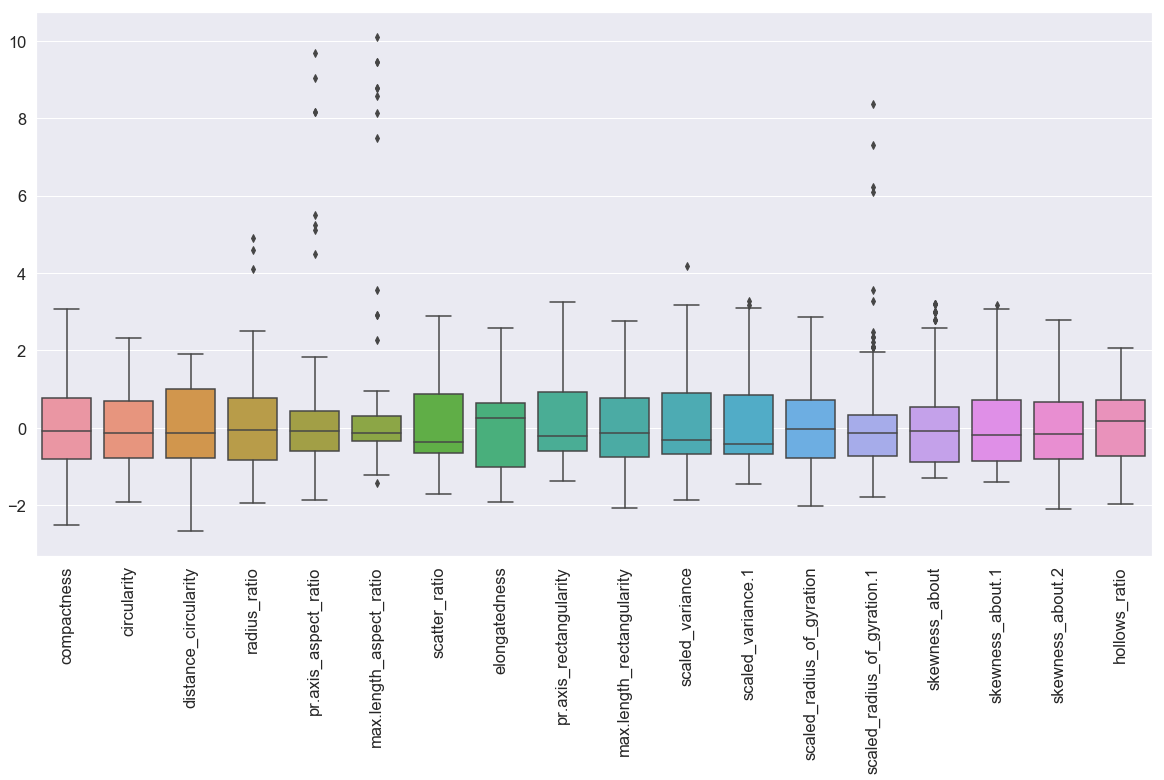

In [126]:
# Lets do a box plot to visualize the spread and outliers

    plt.figure(figsize=(20,10))
    ax = sns.boxplot(data=X_scaled)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.rcParams.update({'font.size': 15})

### Columns such as 'pr.axis_aspect_ratio', 'max.length_aspect_ratio' and 'scaled_radius_of_gyration' have a lot of outliers where values are exceeding 3 sigma from the mean. Lets treat them by replacing with median.

In [127]:
# Replace outliers with nan

X_scaled[abs(X_scaled) > 3] = np.nan

In [128]:
# Now substitute the nans by median

X_scaled.fillna(X_scaled.median(), inplace=True)

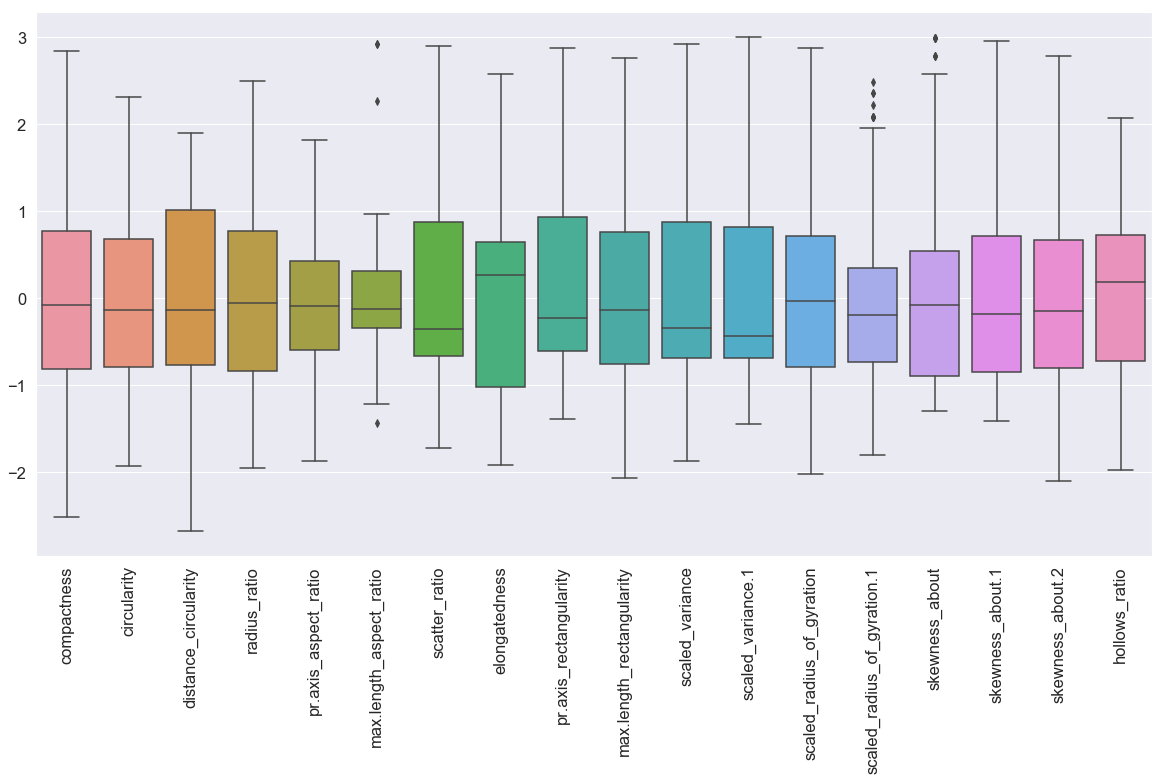

In [129]:
# Lets do a box plot again

plt.figure(figsize=(20,10))
ax = sns.boxplot(data=X_scaled)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.rcParams.update({'font.size': 15})

### Looks good. The outliers have been replaced.

## 2. Understanding the attributes - Find the relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)

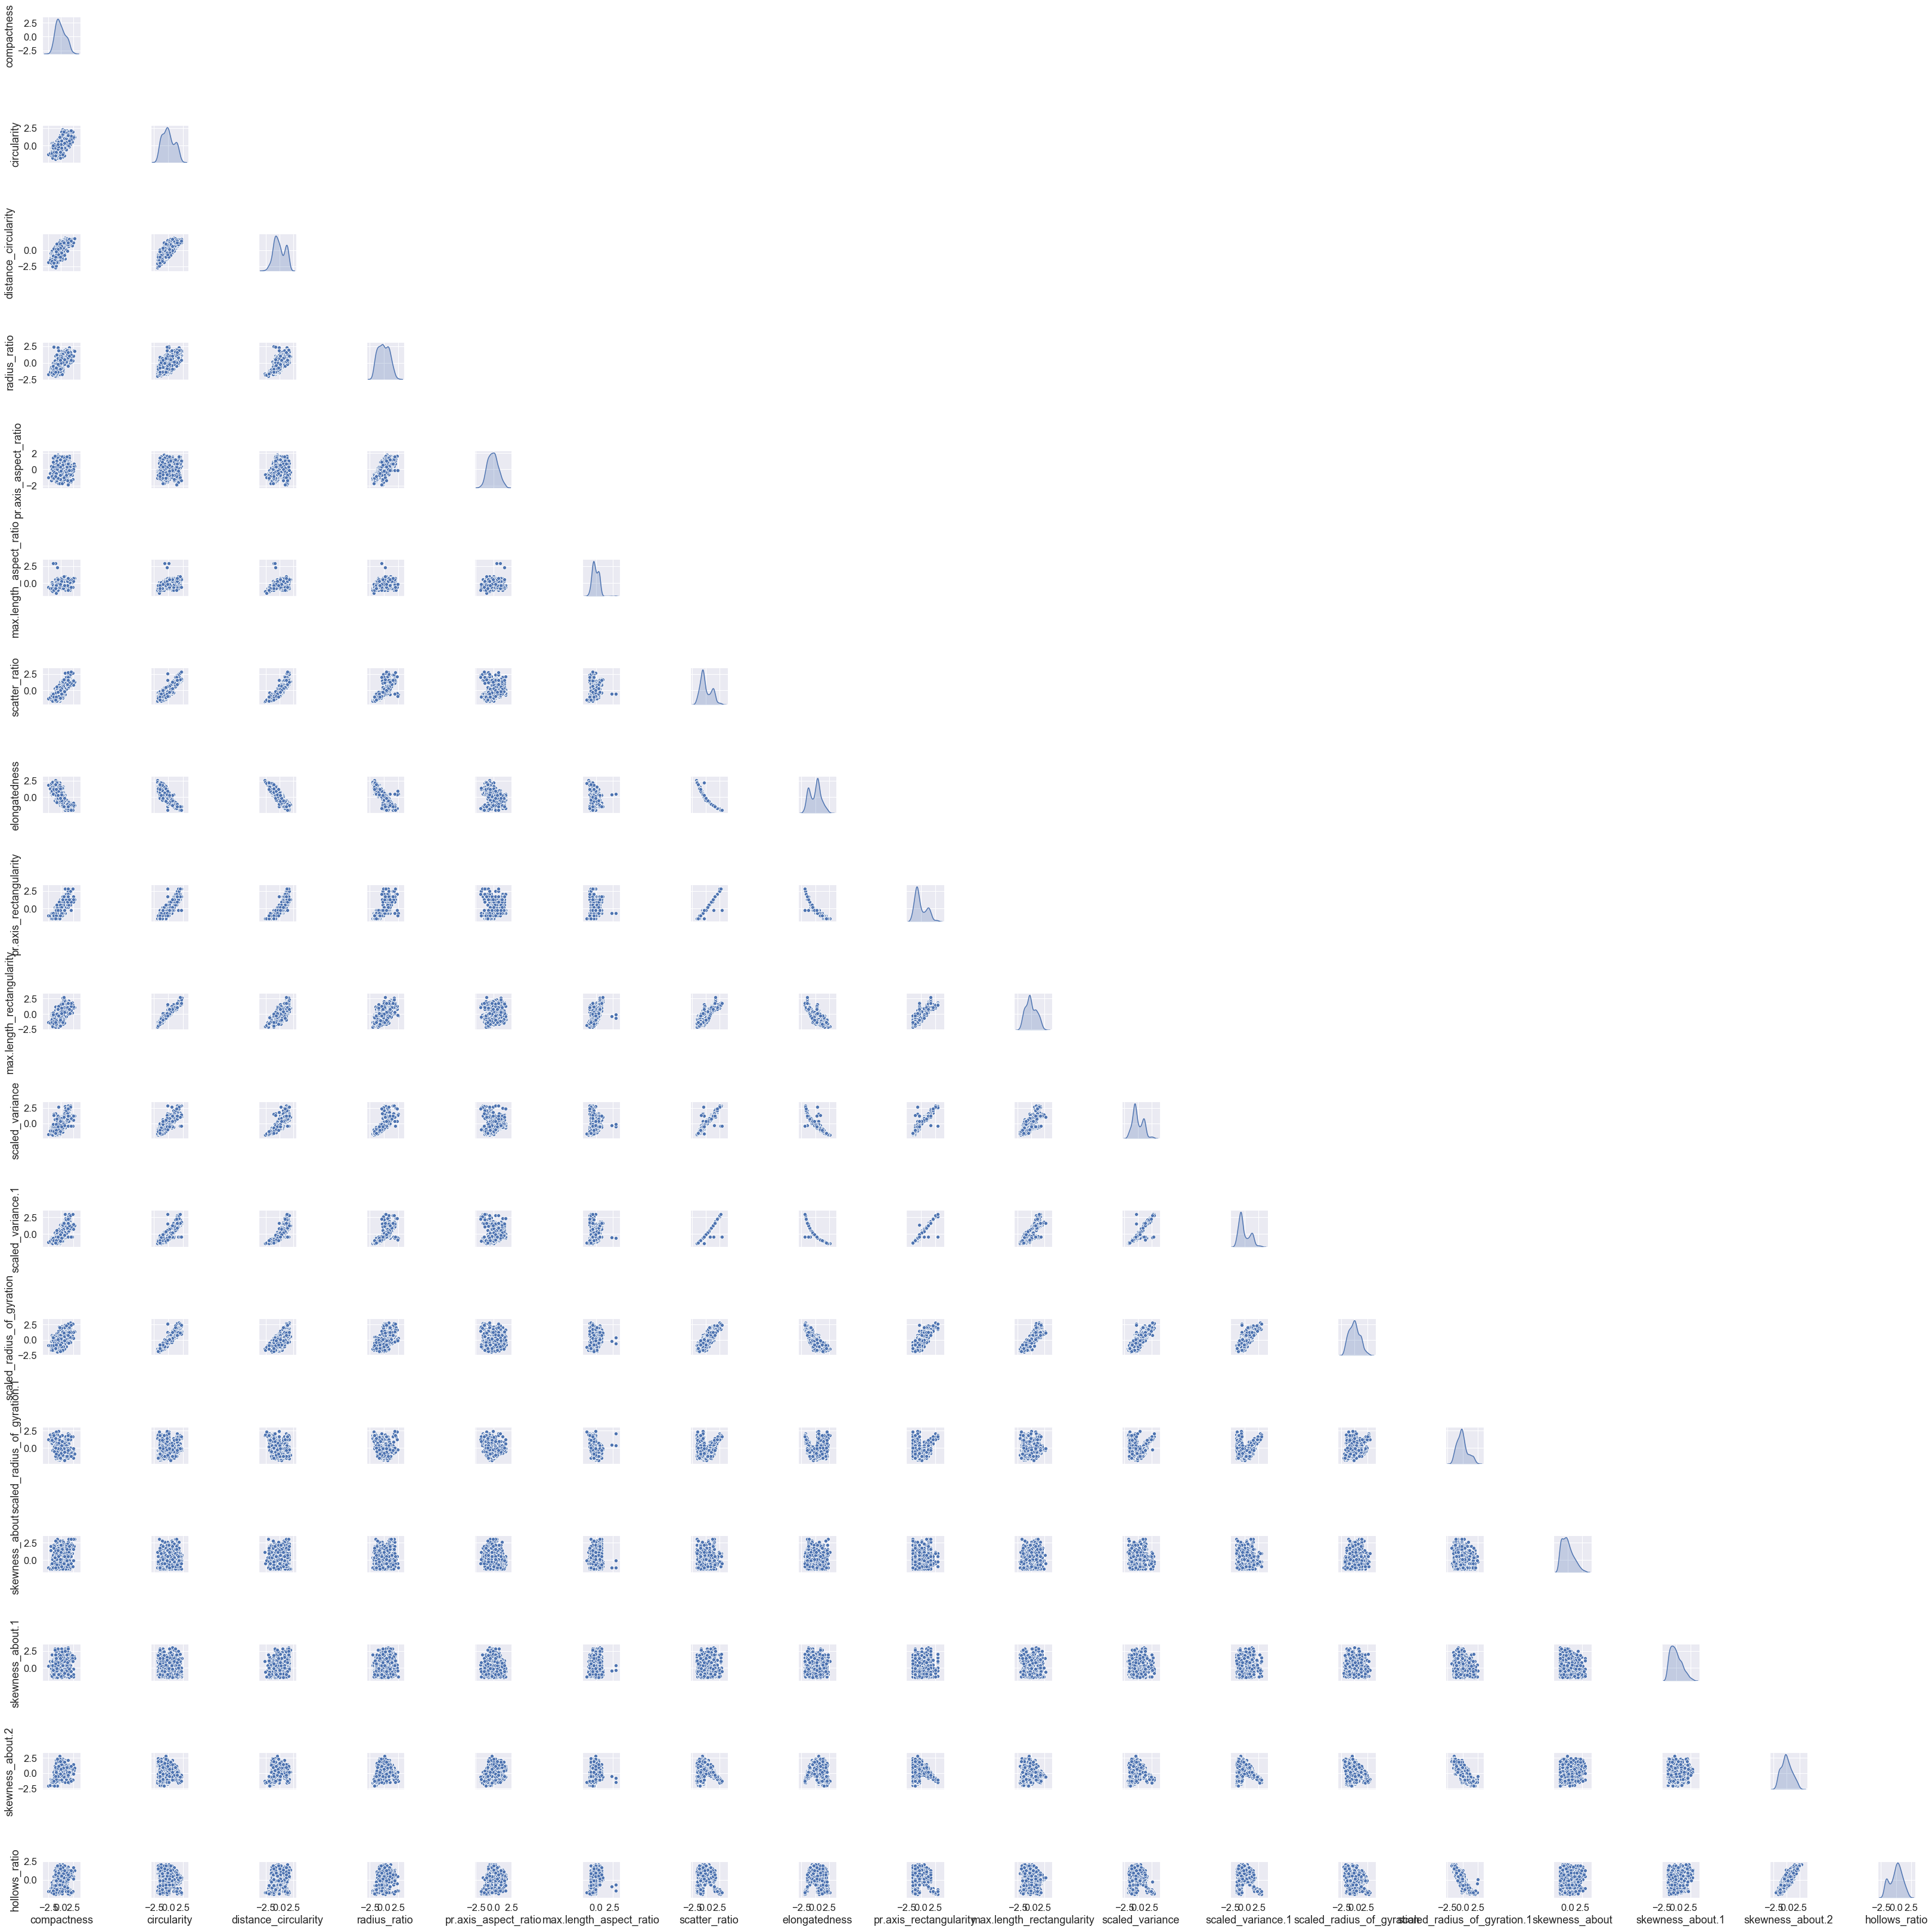

In [130]:
# Lets do a pair plot to understand the relation between variables

# Bi-variate analysis

def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

g = sns.pairplot(X_scaled, diag_kind='kde')
g.map_upper(hide_current_axis)
sns.set(font_scale=1.5)

### Some of the variables look correlated. Lets visualize the strength in a heatmap.

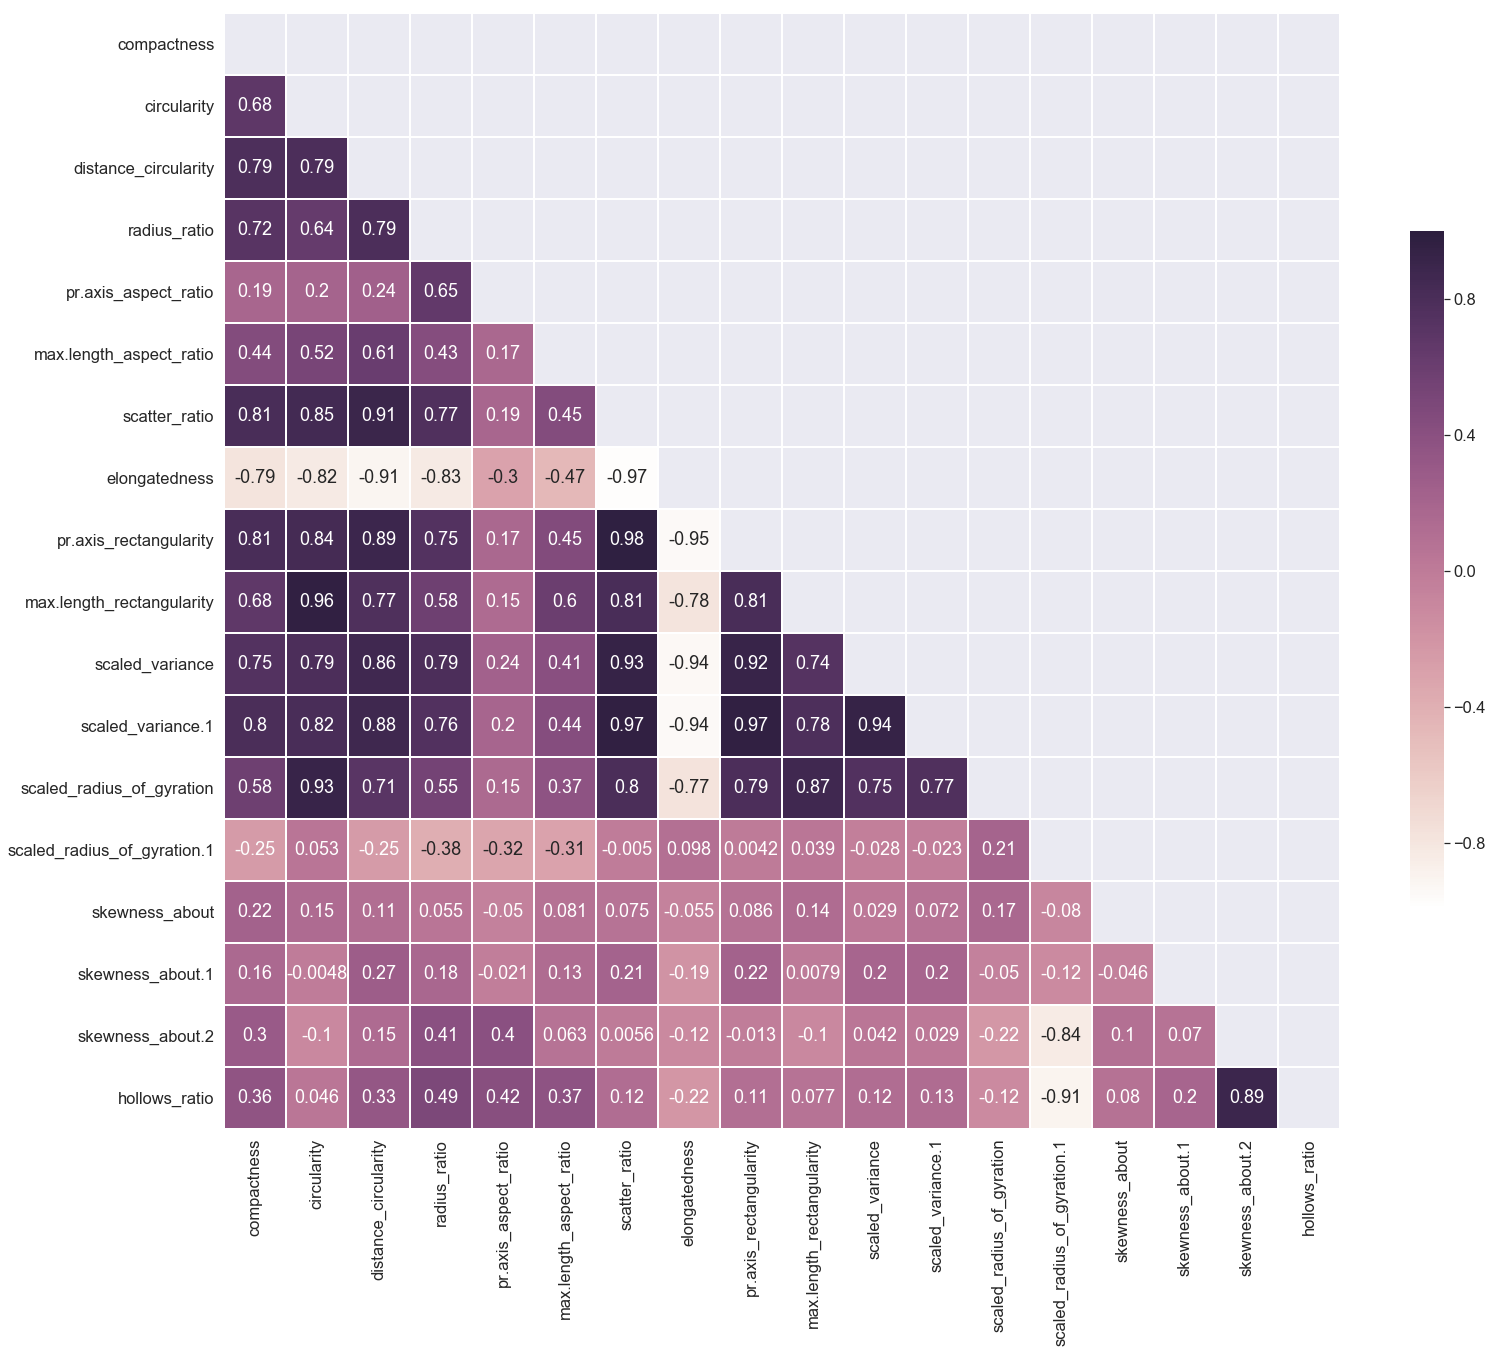

In [131]:
# Do a heatmap for the lower triangle as both upper and lower triangles are symmtrical

# Compute the correlation matrix
corr = X_scaled.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

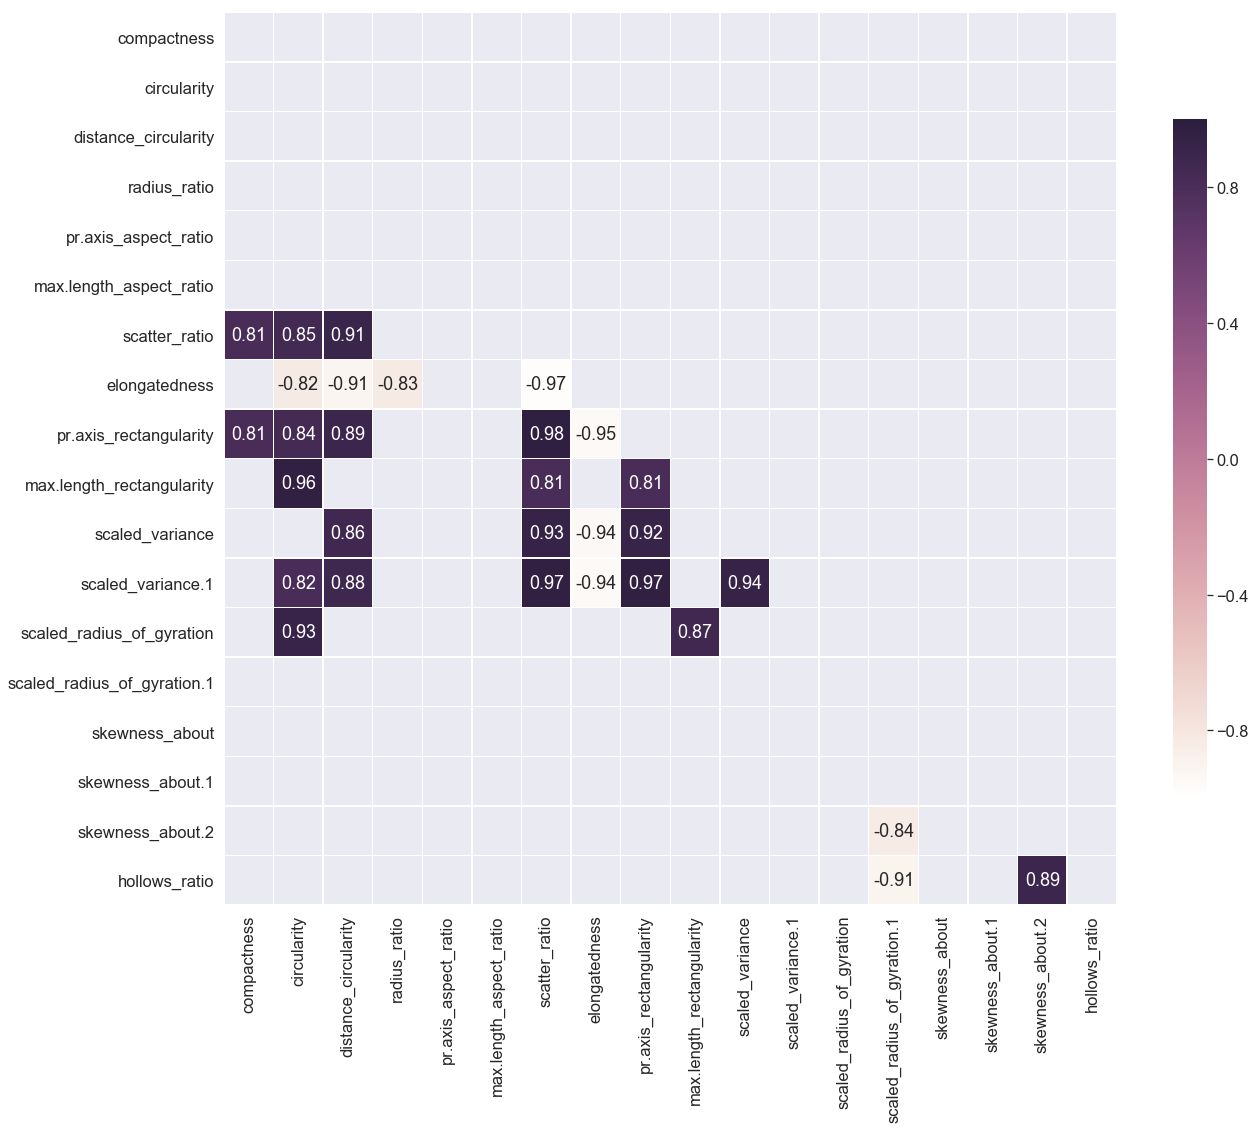

In [132]:
### We can see a lot of variables are highly correlated with each other with absolute values going above 0.8. Lets draw a smaller heatmap with highly correlated variables

# Do a heatmap for the lower triangle as both upper and lower triangles are symmtrical

# Compute the correlation matrix
corr = X_scaled.corr()
corr = corr[abs(corr) > 0.8]

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 25))

# Generate a custom diverging colormap
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

### Going by this matrix column/row wise, we can see there are atleast 9-11 features that are correlated with one or multiple variables. We can consider building our PCA with 9-11 lesser components before going for SVM. So, that should around 7-8 features. Lets confirm that with the elbow plot and explained variance.

## 3. Use PCA from scikit learn and elbow plot to find out a reduced number of dimension (which covers more than 95% of the variance) - 10 points

In [133]:
# Create a covariance matrix for identifying Principal components

covar = np.cov(X_scaled.T)

In [134]:
# Get the eigen values and vectors

eig_val, eig_vec = LA.eig(covar)
eig_val

array([9.20796690e+00, 2.96708954e+00, 1.14855864e+00, 9.34311528e-01,
       4.78021912e-01, 5.22582316e-01, 2.33833482e-01, 2.09613679e-01,
       1.07015036e-01, 8.37780494e-02, 8.36526399e-03, 7.07888381e-02,
       6.14043349e-02, 2.03705422e-02, 2.32181098e-02, 3.08980067e-02,
       4.39941097e-02, 4.73972522e-02])

In [135]:
eig_vec

array([[ 2.77945775e-01, -1.12207137e-01,  6.41657317e-02,
        -1.43361470e-01,  4.04458053e-01, -3.16420365e-03,
        -4.40190651e-01, -6.23317661e-01, -3.16636897e-01,
         3.06809998e-02,  4.21046656e-02,  4.79663472e-02,
         7.46688066e-02,  4.41149269e-02,  3.41925428e-02,
        -1.13241993e-01, -6.93304342e-02,  8.94535675e-02],
       [ 2.96321402e-01,  1.38075304e-01,  1.88457428e-01,
         6.94781538e-02, -2.38947624e-01,  2.53465720e-01,
        -2.07657501e-01,  8.64274712e-02, -8.13187602e-03,
         1.26524528e-01,  5.97346539e-02, -1.22125989e-01,
        -2.17531132e-01, -6.78906103e-01,  3.28422080e-01,
        -1.46551884e-01, -9.33377627e-02, -3.45294734e-03],
       [ 3.09509605e-01, -6.05211274e-02, -7.45495464e-02,
        -6.62951140e-02, -1.00688525e-02,  1.27516625e-01,
         4.28490035e-01, -6.01949103e-02, -2.65712785e-01,
        -2.99008588e-01,  6.53708360e-03,  4.15728744e-01,
        -3.95023839e-01, -6.01000574e-02,  4.76321734e

In [136]:
# Find variance and cumulative variance by each eigen vector

total_var = eig_val.sum()
sort_var = np.sort(eig_val)
sort_var[:] = sort_var[::-1]

explained_variance = [0]
cum_var = [0]
cum_var_arr = [0]
id = np.linspace(1,18,num=18, dtype='int64')
for id, var in zip(id, sort_var):
    e_var = var/total_var * 100.0
    explained_variance.append(e_var)
    cum_var = cum_var + e_var
    cum_var_arr.append(cum_var)
    print('The total variance until attribute %1.0f is %3.2f' %(id, cum_var))


The total variance until attribute 1 is 56.84
The total variance until attribute 2 is 75.16
The total variance until attribute 3 is 82.25
The total variance until attribute 4 is 88.02
The total variance until attribute 5 is 91.24
The total variance until attribute 6 is 94.19
The total variance until attribute 7 is 95.64
The total variance until attribute 8 is 96.93
The total variance until attribute 9 is 97.59
The total variance until attribute 10 is 98.11
The total variance until attribute 11 is 98.55
The total variance until attribute 12 is 98.92
The total variance until attribute 13 is 99.22
The total variance until attribute 14 is 99.49
The total variance until attribute 15 is 99.68
The total variance until attribute 16 is 99.82
The total variance until attribute 17 is 99.95
The total variance until attribute 18 is 100.00


### We can see the total variance is explained for around 95% until the 7th attribute. So, we could do a PCA for 7 components.

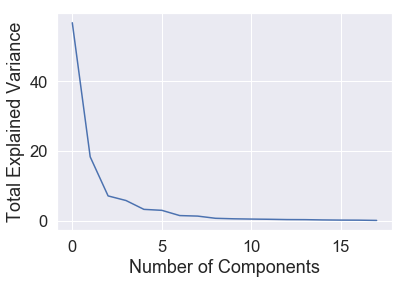

In [137]:
# Plot explained variance

plt.plot(explained_variance[1:])
plt.ylabel('Total Explained Variance')
plt.xlabel('Number of Components')
plt.show()

In [138]:
### We can see that the elbow of this somewhere around 4-5 but the graph starts flattening out after 7. Which again confirms that 7 components would explain most of the variance in the data and rest contribute a minimal.

In [139]:
# Lets build our PCA but before that lets do the test train split as we want to perform (fit) PCA only on the train data and not on the test data as we do not want the SVM model to understand the variance in test data.

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.3, random_state=101)

In [155]:
# PCA

pca = PCA(n_components = 7)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

## 4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyperparameters and do cross-validation to find the accuracy. (10 points)

In [156]:
# Find the best model using GridSearch on SVM

# Build Hyper Parameters Set
params = {'C':[0.1,0.5,1,5,10,50,100,150],
          'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 
          'degree':[0.3, 0.9,3,9]}

In [157]:
# Tune model using GridSearch

svc = svm.SVC(random_state=101)
svc_best = GridSearchCV(svc, param_grid=params, cv=5, n_jobs=-1)
svc_best.fit(pca.transform(X_train), y_train)

C:\Users\rswai\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=101,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.1, 0.5, 1, 5, 10, 50, 100, 150], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'degree': [0.3, 0.9, 3, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [158]:
#Print best hyper parameters set
print("Best Hyper Parameters: \n",svc_best.best_params_,"\n")

print("Best Estimation:\n", svc_best.best_estimator_,'\n' )

print("Best Score : \n", svc_best.best_score_ )

Best Hyper Parameters: 
 {'C': 1, 'degree': 0.3, 'kernel': 'rbf'} 

Best Estimation:
 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=0.3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=101,
  shrinking=True, tol=0.001, verbose=False) 

Best Score : 
 0.9222972972972973


In [159]:
# Prediction
prediction=svc_best.predict(pca.transform(X_test))

# Accuracy
# check the accuracy on the training set
print('Train Accuracy :', svc_best.score(pca.transform(X_train), y_train))
print('Test Accuracy :',  svc_best.score(pca.transform(X_test), y_test), "\n")

# Confusion Matrix 
print("Confusion Matrix:   \n", confusion_matrix(prediction,y_test))

Train Accuracy : 0.9543918918918919
Test Accuracy : 0.9173228346456693 

Confusion Matrix:   
 [[ 64   1   2]
 [  0 117   4]
 [  3  11  52]]


### We have a decent accuracy when we chose to keep 7 components as we decide to keep 95% of the variance.

### Additional work

### Lets choose to keep components which would explain 97% of the variance and in this case 9 components and see what happens through the same sequence of steps

In [160]:
# PCA

pca = PCA(n_components = 9)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [161]:
# Find the best model using GridSearch on SVM

# Build Hyper Parameters Set
params = {'C':[0.1,0.5,1,5,10,50,100,150],
          'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 
          'degree':[0.3, 0.9,3,9]}

In [162]:
# Tune model using GridSearch

svc = svm.SVC(random_state=101)
svc_best = GridSearchCV(svc, param_grid=params, cv=5, n_jobs=-1)
svc_best.fit(pca.transform(X_train), y_train)

C:\Users\rswai\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=101,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.1, 0.5, 1, 5, 10, 50, 100, 150], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'degree': [0.3, 0.9, 3, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [163]:
#Print best hyper parameters set
print("Best Hyper Parameters: \n",svc_best.best_params_,"\n")

print("Best Estimation:\n", svc_best.best_estimator_,'\n' )

print("Best Score : \n", svc_best.best_score_ )

Best Hyper Parameters: 
 {'C': 10, 'degree': 0.3, 'kernel': 'rbf'} 

Best Estimation:
 SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=0.3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=101,
  shrinking=True, tol=0.001, verbose=False) 

Best Score : 
 0.964527027027027


In [164]:
# Prediction
prediction=svc_best.predict(pca.transform(X_test))

# Accuracy
# check the accuracy on the training set
print('Train Accuracy :', svc_best.score(pca.transform(X_train), y_train))
print('Test Accuracy :',  svc_best.score(pca.transform(X_test), y_test), "\n")

# Confusion Matrix 
print("Confusion Matrix:   \n", confusion_matrix(prediction,y_test))

Train Accuracy : 0.9915540540540541
Test Accuracy : 0.9488188976377953 

Confusion Matrix:   
 [[ 65   0   0]
 [  0 120   2]
 [  2   9  56]]


### We do get an improved test accuracy which is good. But an training accuracy close to 100 which means it is definitely overfitting the model. So, this model worked for this particular test data and gave a higher accuracy but may not for new data.